## Package preparation

https://github.com/Chan-Young/FBA/blob/main/FBA%20Coursework%202019_20171924.pdf

In [1]:
'''Installed'''
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [90]:
'''Additonal package requirements'''
from sklearn import tree 
from sklearn.model_selection import train_test_split
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.system('dot -Tpng random.dot -o random.png')
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from subprocess import call
from IPython.display import Image
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import dummy

## Read file

In [4]:
# Read file
df = pd.read_csv('lixcl68.csv')

yes = df[df.y == 'yes']
no = df[df.y == 'no']

# Section A: Summarization

In [4]:
'''
Summary: 
    input variable ‘default’, ‘loan’, ‘housing’, ‘duration’ and ‘poutcome’ 
    shows highly related to variable ‘y’.
'''

'\nSummary: \n    input variable ‘default’, ‘loan’, ‘housing’, ‘duration’ and ‘poutcome’ \n    shows highly related to variable ‘y’.\n'

### A-1. Summary statistical analysis of numerical variables
##### (Numeric: age, balance, day, duration, campaign, pdays and preivous)

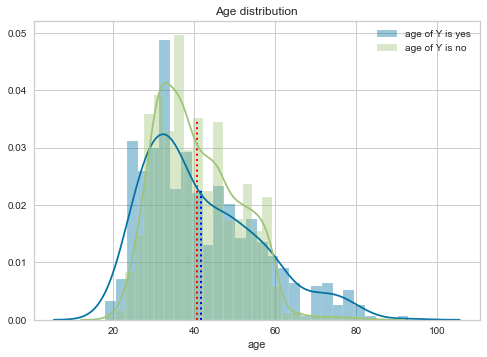

In [5]:
# age distribution by Y
fig = plt.figure()

for dataset in (yes.age, no.age):
    sns.distplot(dataset, bins=28)
plt.legend(['age of Y is yes', 'age of Y is no'])   
plt.title('Age distribution')
plt.xlabel('age')

plt.vlines(x = 41.789565, ymin = 0, ymax = 0.023, color = 'blue', linestyle = 'dotted', linewidth = 2)
plt.vlines(x = 40.776497, ymin = 0, ymax = 0.035, color = 'red', linestyle = 'dotted', linewidth = 2)

fig.savefig('age distribution by Y.png', dpi=fig.dpi)

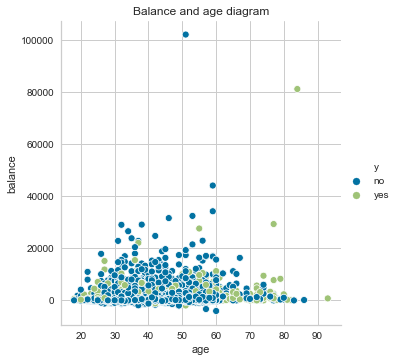

In [6]:
# Balance and age diagram
balance_age = sns.relplot(x='age', y='balance', hue='y', data=df)
plt.title('Balance and age diagram')
balance_age.savefig("balance_age.png")

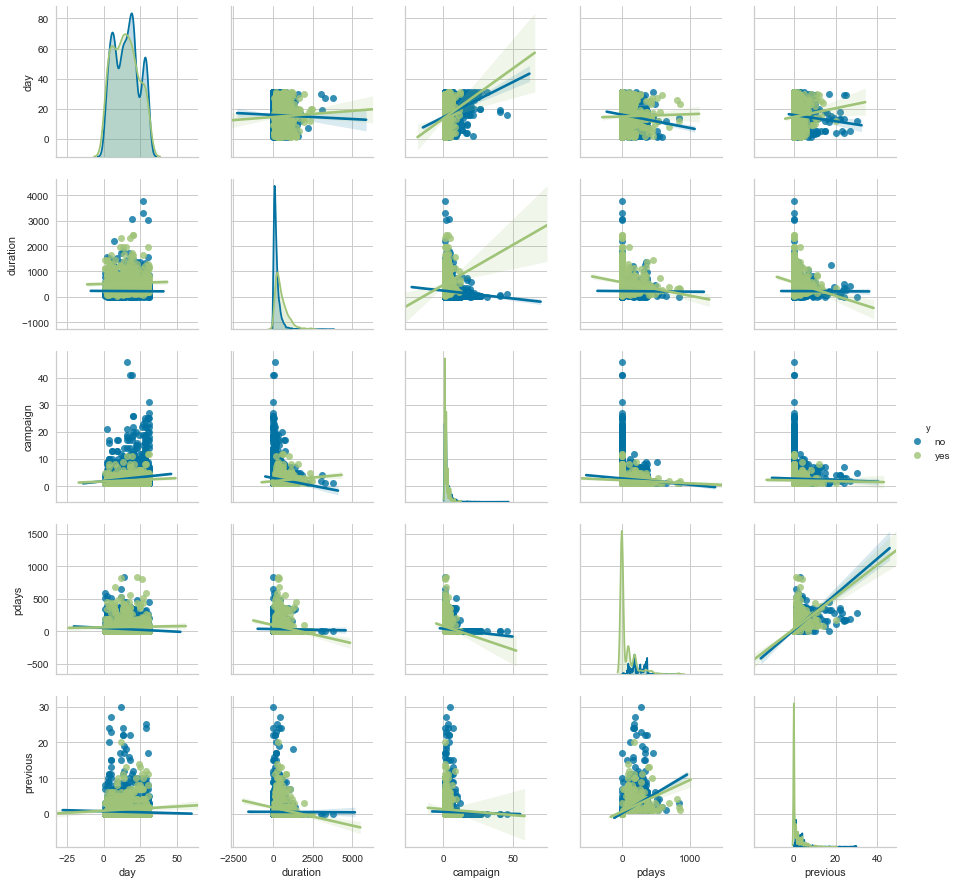

In [7]:
# Correlation between day, duration, campaign, pdays and preivous
sns.pairplot(df, vars = ['day', 'duration', 'campaign', 'pdays', 'previous'], hue='y', kind='reg')
plt.show()

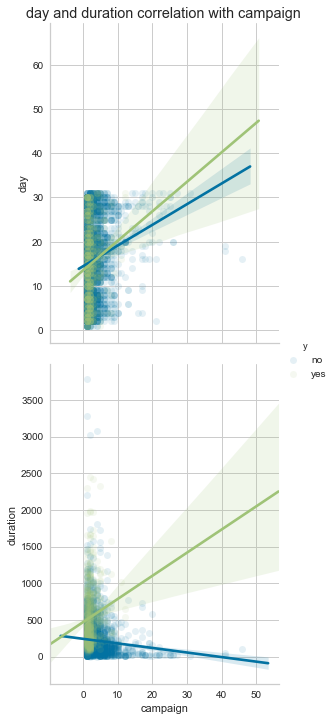

In [8]:
# Day and duration correlation with campaign
campaign_relation = sns.pairplot(df, x_vars=['campaign'], y_vars=['day', 'duration'], 
             hue='y',height=5, aspect=.8, kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.1}})
campaign_relation.fig.suptitle('day and duration correlation with campaign', y = 1)
campaign_relation.savefig("campaign_relation.png")

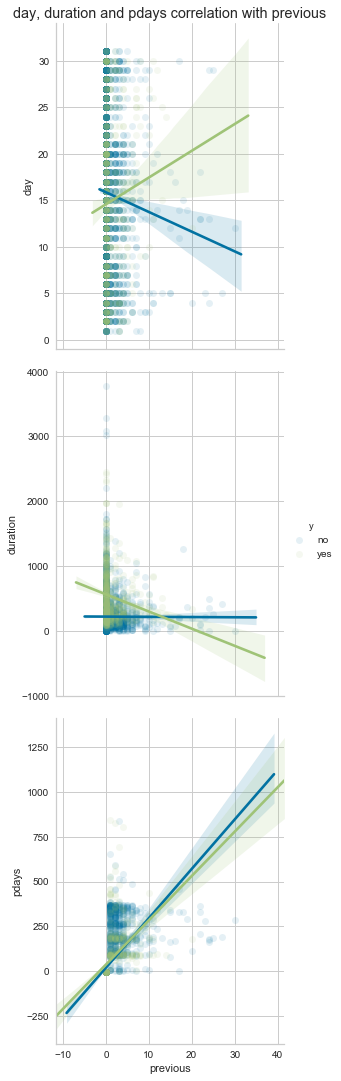

In [9]:
# Day, duration and pdays correlation with previous
previous_relation = sns.pairplot(df, x_vars=['previous'], y_vars=['day', 'duration','pdays'],
             hue='y',height=5, aspect=.8, kind='reg',
            plot_kws={'scatter_kws': {'alpha': 0.1}})
previous_relation.fig.suptitle('day, duration and pdays correlation with previous', y = 1)
previous_relation.savefig("previous_relation.png")

### A-2. Summary statistical analysis of categorical variables
##### (Categorical: job, marital, education, default, housing, loan, contact and poutcome)

In [10]:
# Preparation for analyzing age variable
df['ageGroup'] = pd.cut(df.age,[0, 30, 40, 50, 60, 70, 100], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-100'])
df['ageGroup'].head()

byage = df.groupby(['ageGroup','default']).y.value_counts(normalize=True)
byage2 = byage.unstack().drop('no', axis=1).unstack()

byage2.columns = ['No', 'Yes']
byage2.columns.name = 'default'

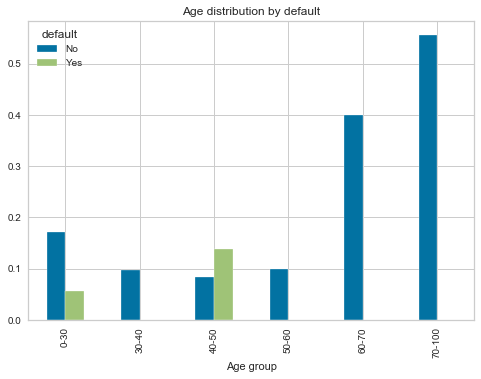

In [11]:
# Age distribution by default
byage2.plot(kind='bar')
plt.title('Age distribution by default')
plt.xlabel('Age group')
plt.savefig('Age distribution by default.png')

In [12]:
# Preparation
byjob = df.groupby('job').y.value_counts(normalize=True)
bymarital= df.groupby('marital').y.value_counts(normalize=True)
byeducation = df.groupby('education').y.value_counts(normalize=True)
bydefault = df.groupby('default').y.value_counts(normalize=True)
byhouse = df.groupby('housing').y.value_counts(normalize=True)
byloan = df.groupby('loan').y.value_counts(normalize=True)
bycontact = df.groupby('contact').y.value_counts(normalize=True)
bypoutcome = df.groupby('poutcome').y.value_counts(normalize=True)

Text(0.5, 0, 'Job')

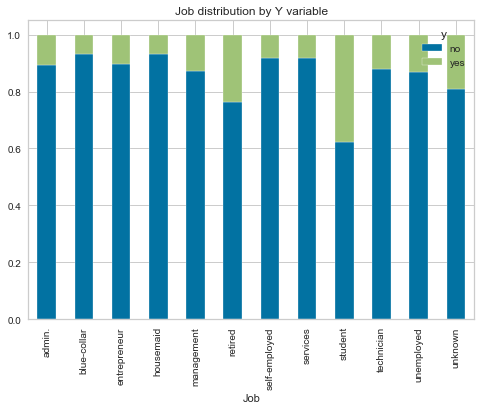

In [13]:
# Job distribution by Y variable
byjob.unstack().plot(kind='bar', stacked=True)
plt.title('Job distribution by Y variable')
plt.xlabel('Job')

Text(0.5, 0, 'Marital')

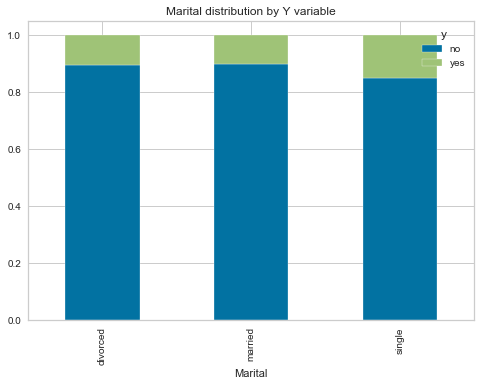

In [14]:
# Marital distribution by Y variable
bymarital.unstack().plot(kind='bar', stacked=True)
plt.title('Marital distribution by Y variable')
plt.xlabel('Marital')

Text(0.5, 0, 'Education')

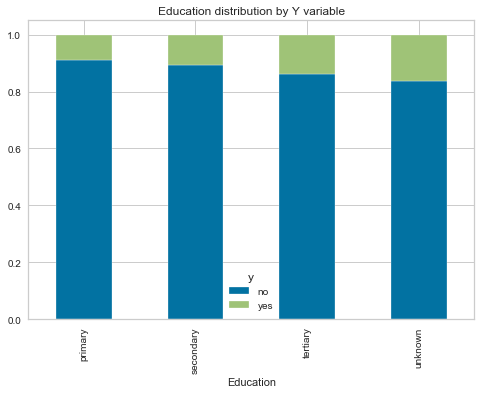

In [15]:
# Education distribution by Y variable
byeducation.unstack().plot(kind='bar', stacked=True)
plt.title('Education distribution by Y variable')
plt.xlabel('Education')

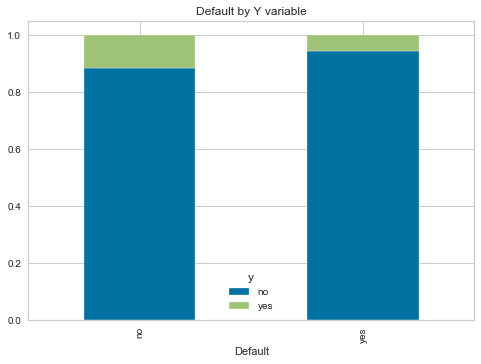

In [16]:
# Default by Y variable
bydefault.unstack().plot(kind='bar', stacked=True)
plt.title('Default by Y variable')
plt.xlabel('Default')
plt.savefig('Default by Y variable.png')

Text(0.5, 0, 'Housing')

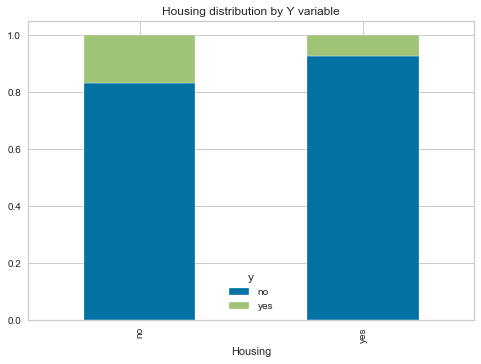

In [17]:
# Housing distribution by Y variable
byhouse.unstack().plot(kind='bar', stacked=True)
plt.title('Housing distribution by Y variable')
plt.xlabel('Housing')

Text(0.5, 0, 'Loan')

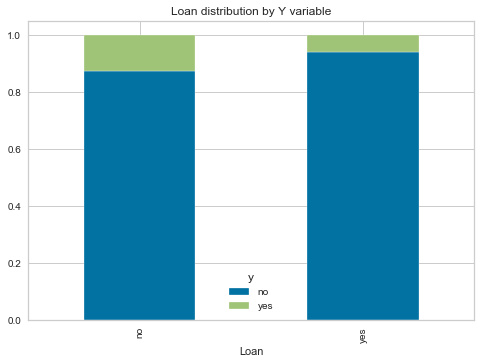

In [18]:
# Loan distribution by Y variable
byloan.unstack().plot(kind='bar', stacked=True)
plt.title('Loan distribution by Y variable')
plt.xlabel('Loan')

Text(0.5, 0, 'Contact')

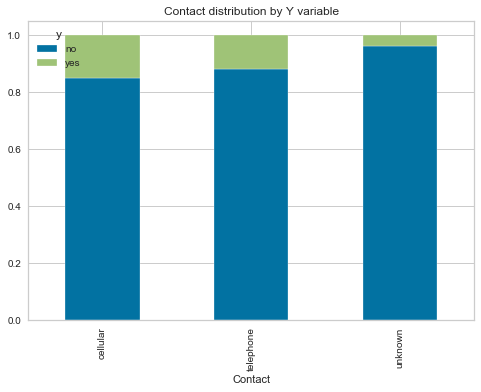

In [19]:
# Contact distribution by Y variable
bycontact.unstack().plot(kind='bar', stacked=True)
plt.title('Contact distribution by Y variable')
plt.xlabel('Contact')

Text(0.5, 0, 'Poutcome')

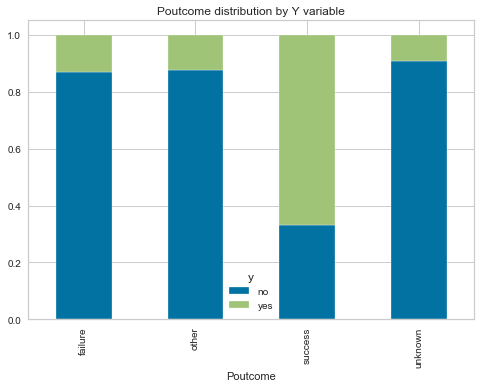

In [20]:
# Poutcome distribution by Y variable
bypoutcome.unstack().plot(kind='bar', stacked=True)
plt.title('Poutcome distribution by Y variable')
plt.xlabel('Poutcome')

# Section B: Exploration

### B-1. Data collation and data cleaning 

In [5]:
df.y = df.y.replace('no',0)
df.y = df.y.replace('yes',1)

df.job = df.job.replace('retired',2)
df.job = df.job.replace('technician',3)
df.job = df.job.replace('self-employed',4)
df.job = df.job.replace('blue-collar',5)
df.job = df.job.replace('student',6)
df.job = df.job.replace('admin.',7)
df.job = df.job.replace('management',8)
df.job = df.job.replace('entrepreneur',9)
df.job = df.job.replace('housemaid',10)
df.job = df.job.replace('services',11)
df.job = df.job.replace('unemployed',12)
df.job = df.job.replace('unknown',13)

df.marital = df.marital.replace('married',14)
df.marital = df.marital.replace('single',15)
df.marital = df.marital.replace('divorced',16)

df.education = df.education.replace('unknown',17)
df.education = df.education.replace('tertiary',18)
df.education = df.education.replace('primary',19)
df.education = df.education.replace('secondary',20)

df.default = df.default.replace('yes',21)
df.default = df.default.replace('no',22)

df.housing = df.housing.replace('yes',23)
df.housing = df.housing.replace('no',24)

df.loan = df.loan.replace('yes',25)
df.loan = df.loan.replace('no',26)

df.contact = df.contact.replace('unknown',27)
df.contact = df.contact.replace('cellular',28)
df.contact = df.contact.replace('telephone',29)

df.poutcome = df.poutcome.replace('unknown',30)
df.poutcome = df.poutcome.replace('other',31)
df.poutcome = df.poutcome.replace('failure',32)
df.poutcome = df.poutcome.replace('success',33)

### B-2. Finding important variables
##### (Through statistical analysis, default, housing, loan, duration and poutcome variable verified as a hghly relatied variables to variable y)

In [22]:
'''
default variables: default, housing, loan, duration and poutcome
examine contact, day, campaign, pdays and previous variable by decision tree 
whether it is useful variable or not

optimal : default, housing, loan, duration and poutcome
'''

'\ndefault variables: default, housing, loan, duration and poutcome\nexamine contact, day, campaign, pdays and previous variable by decision tree \nwhether it is useful variable or not\n\noptimal : default, housing, loan, duration and poutcome\n'

##### B2-1. Decision tree using default, housing, loan, duration, poutcome 

In [6]:
x = df[['default','housing','loan','duration','poutcome']]
y = df[['y']]
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size=0.25, random_state=0, stratify=y)
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(x_train, y_train)
print('Train set score  : {:.3f}'.format(tree.score(x_train, y_train)))
print('Test set score  : {:.3f}'.format(tree.score(x_test, y_test)))
y_pred = tree.predict(x_test)
print(classification_report(y_pred, y_test))

Train set score  : 0.969
Test set score  : 0.868
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1121
           1       0.38      0.42      0.40       129

    accuracy                           0.87      1250
   macro avg       0.65      0.67      0.66      1250
weighted avg       0.87      0.87      0.87      1250



##### B2-2. Decision tree using default, housing, loan, duration, poutcome + contact

In [7]:
x2 = df[['default','housing','loan','duration','poutcome','contact']]
y2 = df[['y']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, 
                                                    test_size=0.25, random_state=0, stratify=y)
tree2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree2.fit(x2_train, y2_train)
print('Train set score  : {:.3f}'.format(tree2.score(x2_train, y2_train)))
print('Test set score  : {:.3f}'.format(tree2.score(x2_test, y2_test)))
y_pred = tree2.predict(x2_test)
print(classification_report(y_pred, y2_test))

Train set score  : 0.976
Test set score  : 0.864
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1118
           1       0.37      0.40      0.38       132

    accuracy                           0.86      1250
   macro avg       0.65      0.66      0.65      1250
weighted avg       0.87      0.86      0.87      1250



##### B2-3. Decision tree using default, housing, loan, duration, poutcome + day

In [25]:
x3 = df[['default','housing','loan','duration','poutcome','day']]
y3 = df[['y']]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, 
                                                    test_size=0.25, random_state=0, stratify=y)
tree3 = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree3.fit(x3_train, y3_train)
print('Train set score 2 : {:.3f}'.format(tree3.score(x3_train, y3_train)))
print('Test set score 2 : {:.3f}'.format(tree3.score(x3_test, y3_test)))
y_pred = tree3.predict(x3_test)
print(classification_report(y_pred, y3_test))

Train set score 2 : 0.996
Test set score 2 : 0.850
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1096
           1       0.38      0.36      0.37       154

    accuracy                           0.85      1250
   macro avg       0.65      0.64      0.64      1250
weighted avg       0.85      0.85      0.85      1250



##### B2-4. Decision tree using default, housing, loan, duration, poutcome + campaign

In [8]:
x4 = df[['default','housing','loan','duration','poutcome','campaign']]
y4 = df[['y']]
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, 
                                                    test_size=0.25, random_state=0, stratify=y)
tree4 = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree4.fit(x4_train, y4_train)
print('Train set score 2 : {:.3f}'.format(tree4.score(x4_train, y4_train)))
print('Test set score 2 : {:.3f}'.format(tree4.score(x4_test, y4_test)))
y_pred = tree4.predict(x4_test)
print(classification_report(y_pred, y4_test))

Train set score 2 : 0.985
Test set score 2 : 0.854
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1101
           1       0.38      0.37      0.38       149

    accuracy                           0.85      1250
   macro avg       0.65      0.64      0.65      1250
weighted avg       0.85      0.85      0.85      1250



##### B2-5. Decision tree using default, housing, loan, duration, poutcome + pdays

In [9]:
x5 = df[['default','housing','loan','duration','poutcome','pdays']]
y5 = df[['y']]
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5, 
                                                    test_size=0.25, random_state=0, stratify=y)
tree5 = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree5.fit(x5_train, y5_train)
print('Train set score 2 : {:.3f}'.format(tree5.score(x5_train, y5_train)))
print('Test set score 2 : {:.3f}'.format(tree5.score(x5_test, y5_test)))
y_pred = tree5.predict(x5_test)
print(classification_report(y_pred, y5_test))

Train set score 2 : 0.971
Test set score 2 : 0.868
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1131
           1       0.34      0.41      0.37       119

    accuracy                           0.87      1250
   macro avg       0.64      0.66      0.65      1250
weighted avg       0.88      0.87      0.87      1250



##### B2-6. Decision tree using default, housing, loan, duration, poutcome + previous

In [10]:
x6 = df[['default','housing','loan','duration','poutcome','previous']]
y6 = df[['y']]
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6, 
                                                    test_size=0.25, random_state=0, stratify=y)
tree6 = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree6.fit(x6_train, y6_train)
print('Train set score 2 : {:.3f}'.format(tree6.score(x6_train, y6_train)))
print('Test set score 2 : {:.3f}'.format(tree6.score(x6_test, y6_test)))
y_pred = tree6.predict(x6_test)
print(classification_report(y_pred, y6_test))

Train set score 2 : 0.971
Test set score 2 : 0.867
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1120
           1       0.38      0.42      0.39       130

    accuracy                           0.87      1250
   macro avg       0.65      0.67      0.66      1250
weighted avg       0.87      0.87      0.87      1250



### B-3. Preparation for Decison Trees

In [62]:
df = pd.read_csv('lixcl68.csv')

In [63]:
df = df.drop(['age','job','marital','education', 'balance','contact','day','campaign','pdays','previous'],1)

In [64]:
df.head()

default housing loan  duration poutcome    y
0      no      no  yes       249  unknown   no
1      no     yes   no        58  unknown   no
2      no     yes   no       504  unknown  yes
3      no     yes   no       179    other   no
4      no     yes   no       511  failure  yes

In [65]:
#creating labelEncoder
lb_make = LabelEncoder()
# Converting string labels into numbers
lb_make = LabelEncoder()
df["default"] = lb_make.fit_transform(df["default"])
df["housing"] = lb_make.fit_transform(df["housing"])
df["loan"] = lb_make.fit_transform(df["loan"])
df["poutcome"] = lb_make.fit_transform(df["poutcome"])

df['y'] = lb_make.fit_transform(df['y'])

label = df['y']

features = list(zip(df["default"],df["housing"],df["loan"],
                    df['duration'], df["poutcome"]))

x_train, x_test, y_train, y_test = train_test_split(features,label,
                                                    test_size=0.25, random_state=0,stratify=label)

In [66]:
df.head()

default  housing  loan  duration  poutcome  y
0        0        0     1       249         3  0
1        0        1     0        58         3  0
2        0        1     0       504         3  1
3        0        1     0       179         1  0
4        0        1     0       511         0  1

In [16]:
feature_names = df.columns.tolist()
feature_names = feature_names[0:5]
target_name = np.array(['Y No', 'Y Yes'])

### B-4. Decison Trees
#####  (variable: default, housing, loan, duration and poutcome)

In [89]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(x_train, y_train)

print('Train set score 2 : {:.3f}'.format(tree.score(x_train, y_train)))
print('Test set score 2 : {:.3f}'.format(tree.score(x_test, y_test)))

y_pred = tree.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

Train set score 2 : 0.969
Test set score 2 : 0.862
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             49            95
y_ture No              77          1029
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1106
           1       0.39      0.34      0.36       144

    accuracy                           0.86      1250
   macro avg       0.65      0.64      0.64      1250
weighted avg       0.85      0.86      0.86      1250



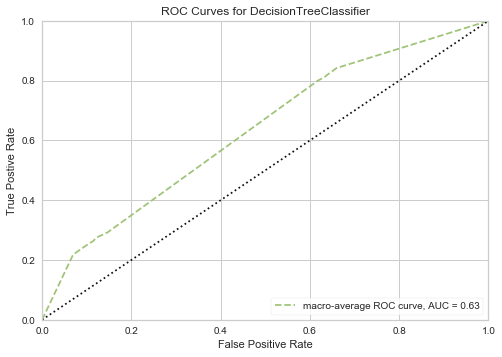

roc_auc_score: 0.6353287623066104


In [68]:
visualizer = ROCAUC(tree, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### B-5. Decison Trees Optimization
##### Tuning parameters using RandomizedSearchCV

In [17]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 22)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
criterion = ['gini', 'entropy']

param_dist = {'max_depth': max_depth, 
              'max_features': max_features, 
              'min_samples_leaf': min_samples_leaf, 
              'min_samples_split': min_samples_split,
              'criterion': criterion} 
  
print(param_dist)

{'max_depth': [10, 14, 19, 24, 29, 33, 38, 43, 48, 52, 57, 62, 67, 71, 76, 81, 86, 90, 95, 100, 105, 110], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}


In [18]:
tree_random = DecisionTreeClassifier(random_state=0) 
tree_cv = RandomizedSearchCV(estimator = tree_random, param_distributions = param_dist, 
                              cv = 5, random_state=0) 
tree_cv.fit(x_train, y_train) 

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter='best'),
 

In [19]:
tree_cv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 76,
 'criterion': 'gini'}

In [20]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth = 76,
                                max_features='auto', min_samples_leaf=10,
                                min_samples_split = 8, random_state=0)
tree2.fit(x_train, y_train)

print('Train set score 2 : {:.3f}'.format(tree2.score(x_train, y_train)))
print('Test set score 2 : {:.3f}'.format(tree2.score(x_test, y_test)))

y_pred = tree2.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

Train set score 2 : 0.902
Test set score 2 : 0.889
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             24           120
y_ture No              19          1087
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1106
           1       0.56      0.17      0.26       144

    accuracy                           0.89      1250
   macro avg       0.73      0.57      0.60      1250
weighted avg       0.86      0.89      0.86      1250



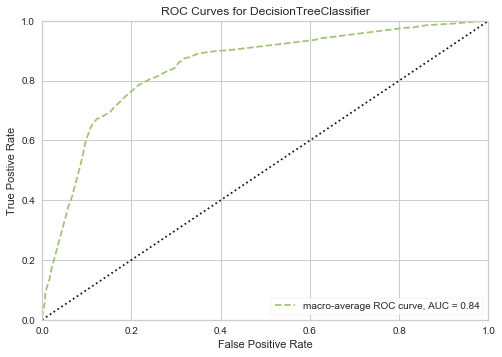

roc_auc_score: 0.5747438215792646


In [21]:
visualizer = ROCAUC(tree2, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### B-6. Decison Tree Optimization 2
##### ( Cannot make a garph from above code, too big to make,
##### downsize each parameters that available to visualize )

In [22]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
criterion = ['gini', 'entropy']

param_dist2 = {'max_depth': max_depth, 
              'max_features': max_features, 
              'min_samples_leaf': min_samples_leaf, 
              'min_samples_split': min_samples_split,
              'criterion': criterion} 
  
print(param_dist2)

{'max_depth': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}


In [23]:
tree_random2 = DecisionTreeClassifier(random_state=0) 
tree_cv2 = RandomizedSearchCV(estimator = tree_random, param_distributions = param_dist2, 
                              cv = 5, random_state=0) 
tree_cv2.fit(x_train, y_train) 

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter='best'),
 

In [24]:
tree_cv2.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'gini'}

In [25]:
tree3 = DecisionTreeClassifier(criterion='gini', max_depth = 4,
                                max_features='sqrt', min_samples_leaf=7,
                                min_samples_split = 2, random_state=0)
tree3.fit(x_train, y_train)

print('Train set score 2 : {:.3f}'.format(tree3.score(x_train, y_train)))
print('Test set score 2 : {:.3f}'.format(tree3.score(x_test, y_test)))

y_pred = tree3.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

Train set score 2 : 0.901
Test set score 2 : 0.896
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             41           103
y_ture No              27          1079
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1106
           1       0.60      0.28      0.39       144

    accuracy                           0.90      1250
   macro avg       0.76      0.63      0.66      1250
weighted avg       0.88      0.90      0.88      1250



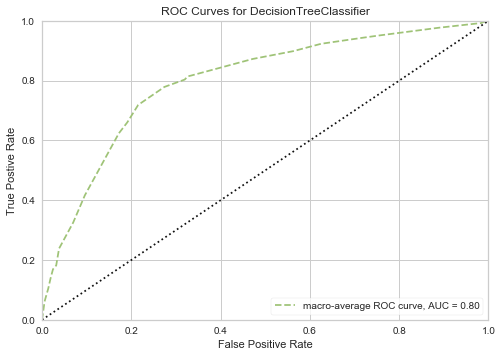

roc_auc_score: 0.6301549628290135


In [26]:
visualizer = ROCAUC(tree3, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### B-7. Decison Tree Visualization

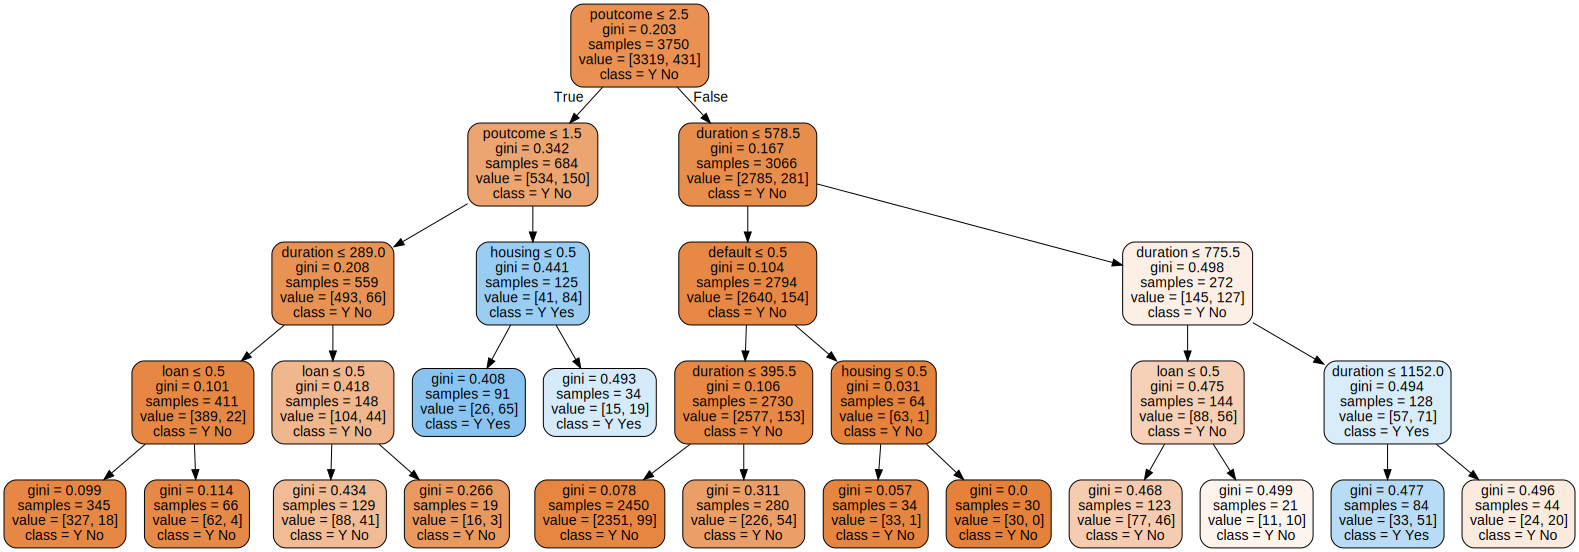

In [27]:
# import tree one more time
from sklearn import tree
dot_data = tree.export_graphviz(tree3, out_file=None, 
                     feature_names=feature_names,  
                     class_names=target_name,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [81]:
tree.export_graphviz(tree3, out_file = 'dtc.dot', class_names=target_name,
               feature_names = feature_names, impurity=False, filled=True)
call(['dot', '-Tpng', 'dtc.dot', '-o', 'Decision_Tree.png', '-Gdpi=900'])
Image(filename = 'Decision_Tree.png')

# Section C: Model Evaluation

## C-1. K-Nearest Neighbours

### C1 - 1. Preparation for KNN

### C1 - 2. KNN

In [91]:
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1, n_neighbors=1,
                           weights='uniform')
knn.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(knn.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(knn.score(x_test, y_test)))

y_pred = knn.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

train set accuracy: 0.961
test set accuracy: 0.844
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             41           103
y_ture No              92          1014
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1106
           1       0.31      0.28      0.30       144

    accuracy                           0.84      1250
   macro avg       0.61      0.60      0.60      1250
weighted avg       0.84      0.84      0.84      1250



### C1 - 3. Finding the optimal K in KNN

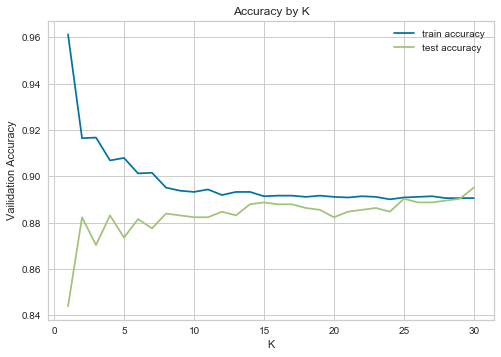

In [92]:
k_list = range(1, 31)
train_accuracies = [] 
test_accuracies = []

for k in k_list:
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, 
                    n_jobs=-1, n_neighbors=k, weights='uniform')
    knn.fit(x_train, y_train)
    train_accuracies.append(knn.score(x_train, y_train))
    test_accuracies.append(knn.score(x_test, y_test))
   
plt.plot(k_list, train_accuracies, label='train accuracy')
plt.plot(k_list, test_accuracies, label='test accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Vailidation Accuracy')
plt.title('Accuracy by K')
plt.show()

### C1 - 4. KNN ROC curve

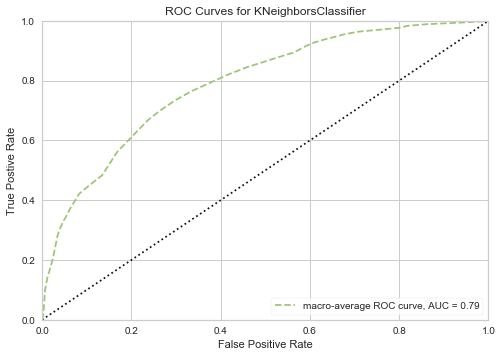

roc_auc_score: 0.6007697910387785


In [93]:
visualizer = ROCAUC(knn, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### C1 - 5. KNN Optimization
##### Tuning parameters using GridSearchCV

In [28]:
n_neighbors = [int(x) for x in np.linspace(1,5, num=5)]
weights = ['uniform', 'distance']
leaf_size = [int(x) for x in np.linspace(1,10, num=10)]
algorithm = ['auto', 'kd_tree']

param_grid = { 'n_neighbors': n_neighbors,
              'weights' : weights,
              'leaf_size' : leaf_size,
              'algorithm' : algorithm}

In [29]:
knn_random = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_random, param_grid,verbose=1, cv=3, n_jobs=-1)
knn_cv.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [30]:
knn_cv.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'}

In [73]:
knn2 = KNeighborsClassifier(algorithm = 'auto', leaf_size = 1,
                            n_jobs=-1, n_neighbors=4, weights='uniform')

knn2.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(knn2.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(knn2.score(x_test, y_test)))

y_pred = knn2.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

train set accuracy: 0.907
test set accuracy: 0.883
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             18           126
y_ture No              20          1086
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1106
           1       0.47      0.12      0.20       144

    accuracy                           0.88      1250
   macro avg       0.68      0.55      0.57      1250
weighted avg       0.85      0.88      0.85      1250



### C1 - 6. Opimized KNN ROC curve

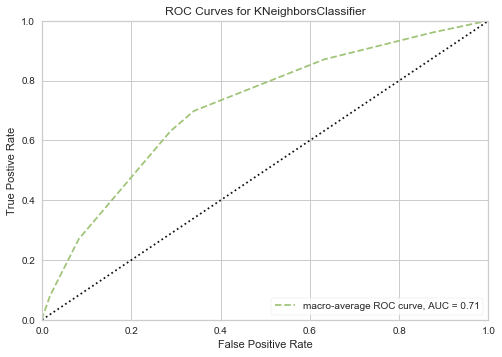

roc_auc_score: 0.5534584086799278


In [32]:
visualizer = ROCAUC(knn2, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

## C-2. Logistic Regression 

### C2 - 1. Prepartion for Logistic Regression  

### C2 - 2. Logistic Regression

In [33]:
log = LogisticRegression(random_state=0)
log.fit(x_train, y_train)
 
x2 = sm.add_constant(features)
model = sm.OLS(label, x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sat, 11 Jan 2020   Prob (F-statistic):          2.32e-211
Time:                        12:58:59   Log-Likelihood:                -887.74
No. Observations:                5000   AIC:                             1787.
Df Residuals:                    4994   BIC:                             1827.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1404      0.013     10.588      0.0

C:\Users\chanl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
print("train set accuracy: {:.3f}".format(log.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(log.score(x_test, y_test)))

y_pred = log.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

train set accuracy: 0.888
test set accuracy: 0.897
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             34           110
y_ture No              19          1087
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1106
           1       0.64      0.24      0.35       144

    accuracy                           0.90      1250
   macro avg       0.77      0.61      0.64      1250
weighted avg       0.88      0.90      0.88      1250



In [80]:
# Find odd in each variable
logit = sm.Logit(label,features)
result = logit.fit()
np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.301453
         Iterations 7


x1    0.722882
x2    0.154148
x3    0.291117
x4    1.003090
x5    0.455043
dtype: float64

### C2 - 3. Logistic Regression ROC curve 

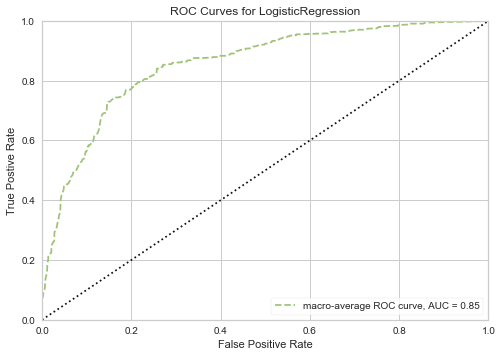

roc_auc_score: 0.609466043801487


In [18]:
visualizer = ROCAUC(log, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### C2 - 4. Logistic Regression Optimization
##### Tunning parameters using GridSearchCV

In [74]:
c_space = np.logspace(-10, 30, 20) 


param_grid = {'C': c_space}

In [ ]:
log_random = LogisticRegression(random_state=0) 
logreg_cv = GridSearchCV(log_random, param_grid, cv = 5) 
logreg_cv.fit(x_train, y_train) 

In [ ]:
'''
GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-...7674e-06, 2.06913808e-04,
       2.63665090e-02, 3.35981829e+00, 4.28133240e+02, 5.45559478e+04,
       6.95192796e+06, 8.85866790e+08, 1.12883789e+11, 1.43844989e+13,
       1.83298071e+15, 2.33572147e+17, 2.97635144e+19, 3.79269019e+21,
       4.83293024e+23, 6.15848211e+25, 7.84759970e+27, 1.00000000e+30])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
'''

In [76]:
logreg_cv.best_params_

{'C': 0.026366508987303555}

In [77]:
log2 = LogisticRegression(random_state=0, C=  0.026366508987303555 )
log2.fit(x_train, y_train)

print("train set accuracy: {:.3f}".format(log2.score(x_train, y_train)))
print("test set accuracy: {:.3f}".format(log2.score(x_test, y_test)))

y_pred = log2.predict(x_test)
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

train set accuracy: 0.889
test set accuracy: 0.892
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             27           117
y_ture No              18          1088
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1106
           1       0.60      0.19      0.29       144

    accuracy                           0.89      1250
   macro avg       0.75      0.59      0.61      1250
weighted avg       0.87      0.89      0.87      1250



C:\Users\chanl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### C2 - 5. Optimized Logistic Regression ROC curve

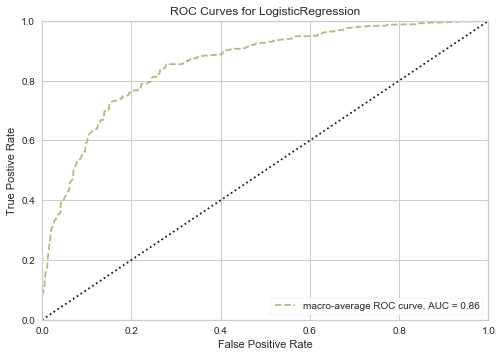

roc_auc_score: 0.609466043801487


In [82]:
visualizer = ROCAUC(log2, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

## C3. Random Forests

### C3 - 1. Preparation for Random Forests

### C3 - 2. Random Forests

In [83]:
forest = RandomForestClassifier(n_estimators=100, max_features=5,max_depth=20,
                       bootstrap=True, oob_score=True,n_jobs=-1, random_state=0)
forest.fit(x_train, y_train)

print('train set accuracy: {:.3f}'.format(forest.score(x_train, y_train)))
print('test set accuracy: {:.3f}'.format(forest.score(x_test, y_test)))

y_pred = forest.predict(x_test)
print('Out-of-bag score estimate: {:.3f}'.format(forest.oob_score_))
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

train set accuracy: 0.968
test set accuracy: 0.869
Out-of-bag score estimate: 0.868
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             54            90
y_ture No              74          1032
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1106
           1       0.42      0.38      0.40       144

    accuracy                           0.87      1250
   macro avg       0.67      0.65      0.66      1250
weighted avg       0.86      0.87      0.87      1250



In [104]:
# Checking importatnce of each variable
for name, score in zip(x, forest.feature_importances_):
    print(name, score)

default 0.004111155029345727
housing 0.060054276878209335
loan 0.03982307569779734
duration 0.7549936186344837
poutcome 0.14101787376016395


### C3 - 3. Random Forests ROC curve

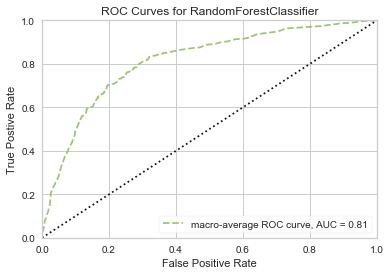

roc_auc_score: 0.6449856841470766


In [105]:
visualizer = ROCAUC(forest, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### C3 - 4. Random Forests Opitmization
##### Tuning hyperparameters using RandomizedSearchCV

In [84]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 250, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 40, num = 20)]
max_depth.append(None)
#min_samples_split = [2, 5, 10]
min_samples_split = [int(x) for x in np.linspace(5, 20, num = 10)]
#min_samples_leaf = [1, 2, 4]
min_samples_leaf = [int(x) for x in np.linspace(5, 10, num = 5)]
bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150, 161, 172, 183, 194, 205, 216, 227, 238, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, None], 'min_samples_split': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20], 'min_samples_leaf': [5, 6, 7, 8, 10], 'bootstrap': [True]}


In [85]:
forest_random = RandomForestClassifier(random_state=0)
forest_cv = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, 
                                  n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
forest_cv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=20,
                                                    max_features=5,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100, n_jobs=-1,
                                                    oob_score=

In [86]:
forest_cv.best_params_

{'n_estimators': 216,
 'min_samples_split': 18,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 35,
 'bootstrap': True}

In [87]:
forest2 = RandomForestClassifier(n_estimators=216, max_features='auto',max_depth=35,
                                min_samples_split = 18,min_samples_leaf = 6,
                       bootstrap=True, oob_score=True,n_jobs=-1, random_state=0)
forest2.fit(x_train, y_train)

print('train set accuracy: {:.3f}'.format(forest2.score(x_train, y_train)))
print('test set accuracy: {:.3f}'.format(forest2.score(x_test, y_test)))

y_pred = forest2.predict(x_test)
print('Out-of-bag score estimate: {:.3f}'.format(forest2.oob_score_))
print('=========================================================')
print('Confusion Matrix')
confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(confusion)
print('=========================================================')
print(classification_report(y_test, y_pred))

train set accuracy: 0.912
test set accuracy: 0.892
Out-of-bag score estimate: 0.897
Confusion Matrix
            y_predict Yes  y_predict No
y_true Yes             41           103
y_ture No              32          1074
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1106
           1       0.56      0.28      0.38       144

    accuracy                           0.89      1250
   macro avg       0.74      0.63      0.66      1250
weighted avg       0.87      0.89      0.88      1250



In [88]:
# Checking importatnce of each variable
for name, score in zip(features, forest2.feature_importances_):
    print(name, score)

(0, 0, 1, 249, 3) 0.000802219503471832
(0, 1, 0, 58, 3) 0.09274743032615954
(0, 1, 0, 504, 3) 0.023076326910315935
(0, 1, 0, 179, 1) 0.6719789350599784
(0, 1, 0, 511, 0) 0.21139508820007424


### C3 - 5. Opimized Random Forests ROC curve

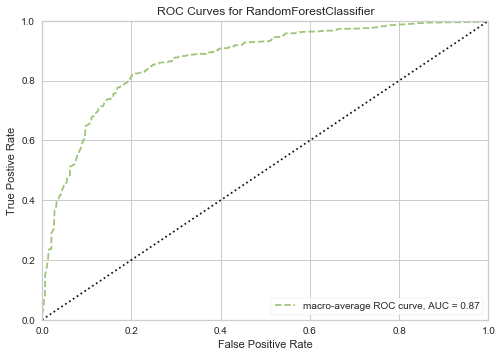

roc_auc_score: 0.6278945649989954


In [89]:
visualizer = ROCAUC(forest2, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

### C3 - 6. Comparing Decision Trees and Random Forests
##### Using Folds and Cross validation

In [91]:
folds = KFold(n_splits=5, shuffle=True, random_state=0)
dc = dummy.DummyClassifier()

dt = DecisionTreeClassifier(criterion='gini', max_depth = 4,
                                max_features='sqrt', min_samples_leaf=7,
                                min_samples_split = 2, random_state=0)
rf = RandomForestClassifier(n_estimators=216, max_features='auto',max_depth=35,
                                min_samples_split = 18,min_samples_leaf = 6,
                       bootstrap=True, oob_score=True,n_jobs=-1, random_state=0)

dt_scores = cross_val_score(dt, features, label, scoring='precision', cv=folds)
rf_scores = cross_val_score(rf, features, label, scoring='precision', cv=folds)

print("Mean DT Accuracy:", np.mean(dt_scores))
print("Mean RF Accuracy:", np.mean(rf_scores))

Mean DT Accuracy: 0.6025520795779556
Mean RF Accuracy: 0.5784353990457601


In [92]:
dt_pred = cross_val_predict(dt, features, label, cv=folds)
print(dt_pred)

dt_pred_matrix = confusion_matrix(label, dt_pred)
print(dt_pred_matrix)

rf_pred = cross_val_predict(rf, features, label, cv=folds)
print(rf_pred)

rf_pred_matrix = confusion_matrix(label, rf_pred)
print(rf_pred_matrix)

[0 0 0 ... 0 0 0]
[[4317  108]
 [ 411  164]]
[0 0 0 ... 0 0 0]
[[4310  115]
 [ 419  156]]


In [103]:
print('*** Decision Trees ***')
dt_confusion = pd.DataFrame(metrics.confusion_matrix(label, dt_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(dt_confusion)
print('=========================================================')
print(classification_report(label, dt_pred))

print('\n')
print('*** Random Forests ***')
rf_confusion = pd.DataFrame(metrics.confusion_matrix(label, rf_pred, labels=[1,0]),
                        index=['y_true Yes','y_ture No'],
                        columns=['y_predict Yes','y_predict No'])
print(rf_confusion)
print('=========================================================')
print(classification_report(label, rf_pred))

*** Decision Trees ***
            y_predict Yes  y_predict No
y_true Yes            164           411
y_ture No             108          4317
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4425
           1       0.60      0.29      0.39       575

    accuracy                           0.90      5000
   macro avg       0.76      0.63      0.67      5000
weighted avg       0.88      0.90      0.88      5000



*** Random Forests ***
            y_predict Yes  y_predict No
y_true Yes            156           419
y_ture No             115          4310
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4425
           1       0.58      0.27      0.37       575

    accuracy                           0.89      5000
   macro avg       0.74      0.62      0.66      5000
weighted avg       0.87      0.89      0.88      5000



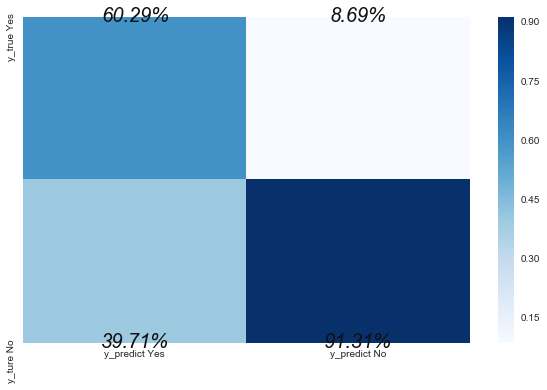

In [113]:
plt.figure(figsize=(10,6))
xticklables = ['y_predict Yes','y_predict No']
yticklables = ['y_true Yes','y_ture No']

annot_kws={'fontsize':20, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':1, 
           'verticalalignment':'center'}

sns.heatmap(dt_confusion/np.sum(dt_confusion), annot=True, 
            fmt='.2%', cmap='Blues',
           xticklabels = xticklables,
           yticklabels = yticklables,
           annot_kws = annot_kws)

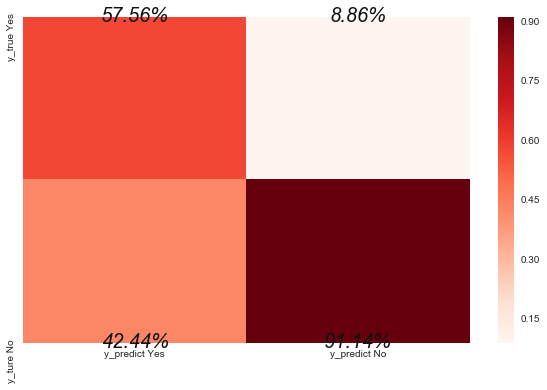

In [114]:
plt.figure(figsize=(10,6))
xticklables = ['y_predict Yes','y_predict No']
yticklables = ['y_true Yes','y_ture No']

annot_kws={'fontsize':20, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':1, 
           'verticalalignment':'center'}

sns.heatmap(rf_confusion/np.sum(rf_confusion), annot=True, 
            fmt='.2%', cmap='Reds',
           xticklabels = xticklables,
           yticklabels = yticklables,
           annot_kws = annot_kws)